# Time series functionality
参考
* https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
* https://zhuanlan.zhihu.com/p/21741962

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
# install the pandas_datareader module
#!pip install pandas-datareader

In [9]:
# import google
from pandas_datareader import data

nlsn = data.DataReader('NLSN', start='2010', end='2019',
                       data_source='yahoo')  # CW: google source is down, use yahoo instead
nlsn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-27,25.850000,24.90,24.900000,25.400000,5809300.0,20.143606
2011-01-28,25.400000,25.00,25.400000,25.000000,2611900.0,19.826380
2011-01-31,26.500000,24.75,24.980000,26.070000,2505300.0,20.674955
2011-02-01,26.629999,25.50,26.450001,25.750000,2155300.0,20.421171
2011-02-02,26.330000,25.74,25.980000,25.950001,1173100.0,20.579782


In [10]:
# For simplicity, we'll use just the closing price:
nlsn = nlsn['Close']

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

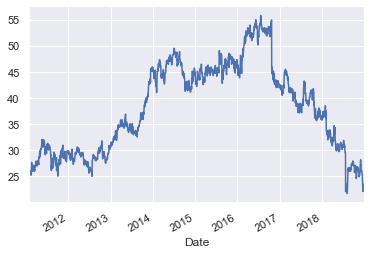

In [12]:
nlsn.plot()

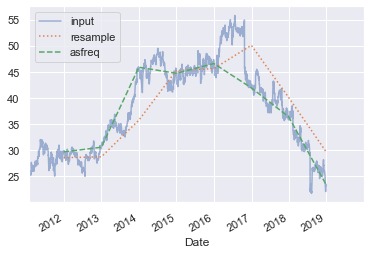

In [13]:
nlsn.plot(alpha=0.5, style='-')
nlsn.resample('BA').mean().plot(style=':')
nlsn.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

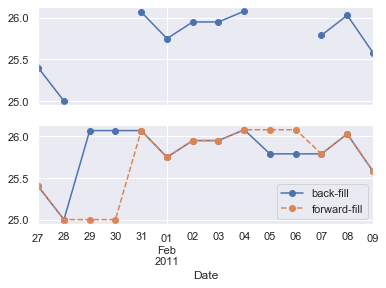

In [14]:
fig, ax = plt.subplots(2, sharex=True)
data = nlsn.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

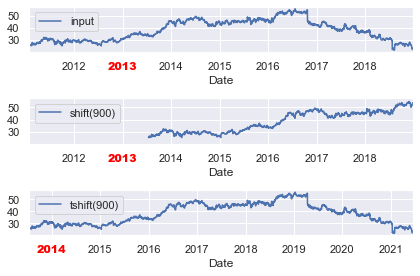

In [25]:

fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
nlsn = nlsn.asfreq('D', method='pad')

nlsn.plot(ax=ax[0])
nlsn.shift(900).plot(ax=ax[1])
nlsn.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

#绘制matplotlib多个图形于一张图时往往会出现相邻图坐标轴重叠的现象，此时只须在汇完所有子图后加上以下代码即可。
plt.tight_layout()

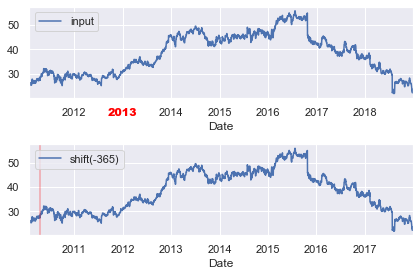

In [29]:

fig, ax = plt.subplots(2, sharey=True)

# apply a frequency to the data
nlsn = nlsn.asfreq('D', method='pad')

nlsn.plot(ax=ax[0])
nlsn.tshift(-365).plot(ax=ax[1])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(-365)'], loc=2)
ax[1].get_xticklabels()[-1].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')


#绘制matplotlib多个图形于一张图时往往会出现相邻图坐标轴重叠的现象，此时只须在汇完所有子图后加上以下代码即可。
plt.tight_layout()

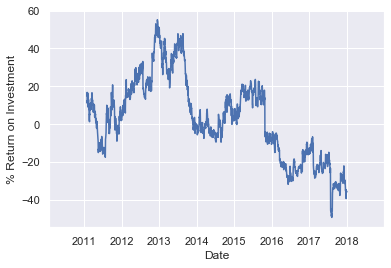

In [27]:
ROI = 100 * (nlsn.tshift(-365) / nlsn - 1)   # (nextyear - thisyear )/thisyear
ROI.plot()
plt.ylabel('% Return on Investment');

